In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [7]:
df = pd.read_csv('housePrice.csv')

In [8]:
df

,area,price
0,1000,678000
1,2500,875490
2,3000,907654
3,3674,1129020
4,1360,412886
5,1794,494465
6,1630,521386
7,1595,465694


Text(0, 0.5, 'Price')

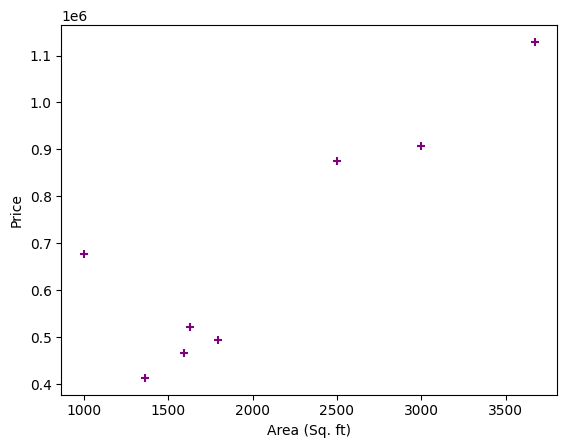

In [9]:
%matplotlib inline
plt.scatter(df.area,df.price,color='purple',marker='+')
plt.xlabel('Area (Sq. ft)')
plt.ylabel('Price')
#plt.grid(True)

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price) #here area is feature(input variable) price is target variable (which will get predicted). 
#So basically we intend to give the area as input (feature) and expect the model to return predicted price 
#fit() trains the model by finding best fit lines(hyperplane) that minimizes the error between predicted and actual values.
reg.predict([[2500]]) #uses y = mx + b

C:\Users\D560926\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([792462.11474837])

In [11]:
reg.coef_ #Shows the value of coefficient in the equation y=mx+b it is 'm'

array([248.07134261])

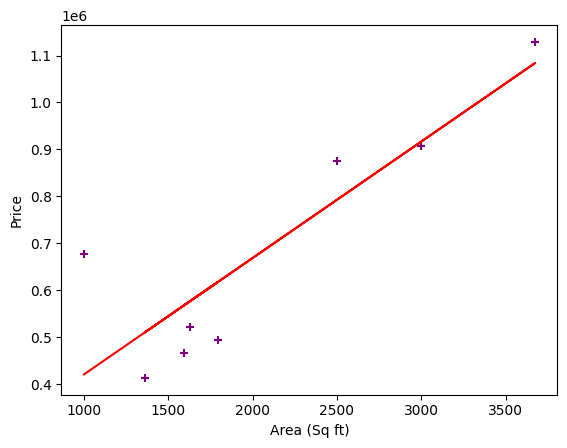

In [12]:
%matplotlib inline
plt.xlabel('Area (Sq ft)')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='purple',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='red')

In [13]:
reg.intercept_ #in the equation y=mx+b it is b(value of y when x is 0)

172283.7582158842

In [14]:
#Y=MX+B 
#y is the targeted variable(prediction)
#m is the coefficient(slope, how much y changes for each unit change in x)
#x is input variable(feature)
#b is intercept or the value of y when x is 0

In [15]:
#doing the prediction in equation format
#y=m*x+b, we have m, x and b
#x = 2500, m = 248.07134261 and b = 172283.75821588427
248.07134261*2500+172283.75821588427

792462.1147408842

In [16]:
#hence it proves that using the equation this model worked


In [17]:
dd = pd.read_csv('areas.csv')
dd

,area
0,8917
1,4113
2,4662
3,5541
4,4142
5,2183
6,6501
7,2746
8,5301
9,8457


In [18]:
p = reg.predict(dd[['area']])
p

array([2384335.92029597, 1192601.19038314, 1328792.35747767,
       1546847.0676345 , 1199795.25931891,  713823.49914005,
       1784995.55654297,  853487.66503117, 1487309.94540738,
       2270223.10269399,  719777.21136277, 1419090.3261888 ,
       2157102.57046247,  512141.49759569, 2167025.42416699])

In [19]:
dd['prices'] = p.astype(int)

In [20]:
dd.to_csv('FirstPrediction.csv',index=False)

In [21]:
dd.head()


,area,prices
0,8917,2384335
1,4113,1192601
2,4662,1328792
3,5541,1546847
4,4142,1199795


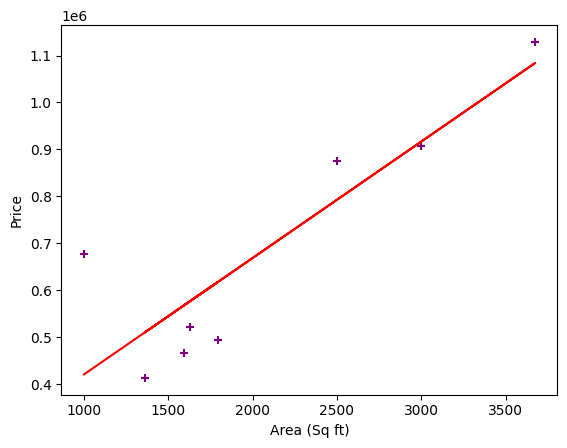

In [22]:
%matplotlib inline
plt.xlabel('Area (Sq ft)')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='purple',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='red')
#plt.scatter(df.area,df.price,color='purple',marker='+')
#plt.plot(df.area,reg.predict(df[['area']]),color='red')

In [23]:
reg.predict([[3000]])

C:\Users\D560926\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([916497.78605487])

In [24]:
import pickle

In [25]:
with open('model_pickle','wb') as f: 
#model_pickle is the name of the file 
#where the trained model is saved
    pickle.dump(reg,f)

In [26]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [27]:
mp.predict([[3000]])

C:\Users\D560926\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([916497.78605487])

In [35]:
#using JOBLIB to do the same thing
#when our process contains large number of numpy array
from sklearn.externals import joblib as jb

In [36]:
jb.dump(reg,'model_joblib')

['model_joblib']

In [37]:
mm = joblib.load('model_joblib')

In [38]:
mm.predict([[2300]])

C:\Users\D560926\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([742847.84622578])